## Lab 5 - Using link functions to create generalized linear model

In [5]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Read CSV file
data = pd.read_csv("Airline_data.csv")
display(data)

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


### Prior predictive test

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


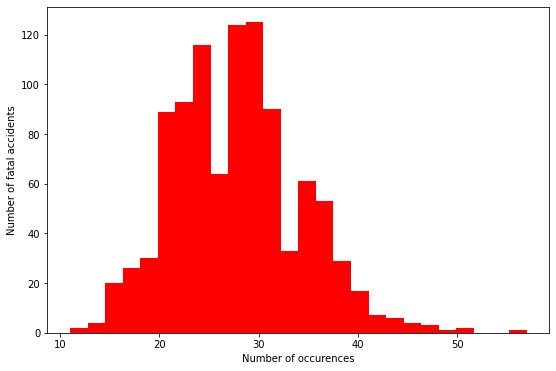

In [7]:
model_ppc = CmdStanModel(stan_file='prior.stan')
ppc = model_ppc.sample(data={"alpha" : np.log(data["Fatal accidents"].mean()), 
                             "miles" : data["Miles flown [100 mln miles]"].mean() / 10000}, # For model to work, mean miles have to be kept in range <0, 1>
                       iter_sampling=1000, 
                       iter_warmup=0, 
                       chains=1)


ppc_df = ppc.draws_pd()
plt.figure(figsize=(9, 6))
plt.hist(ppc_df["y_sim"], bins="auto", color='red')
plt.xlabel("Number of occurences")
plt.ylabel("Number of fatal accidents")
plt.show()

### Posterior predictive distribution

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


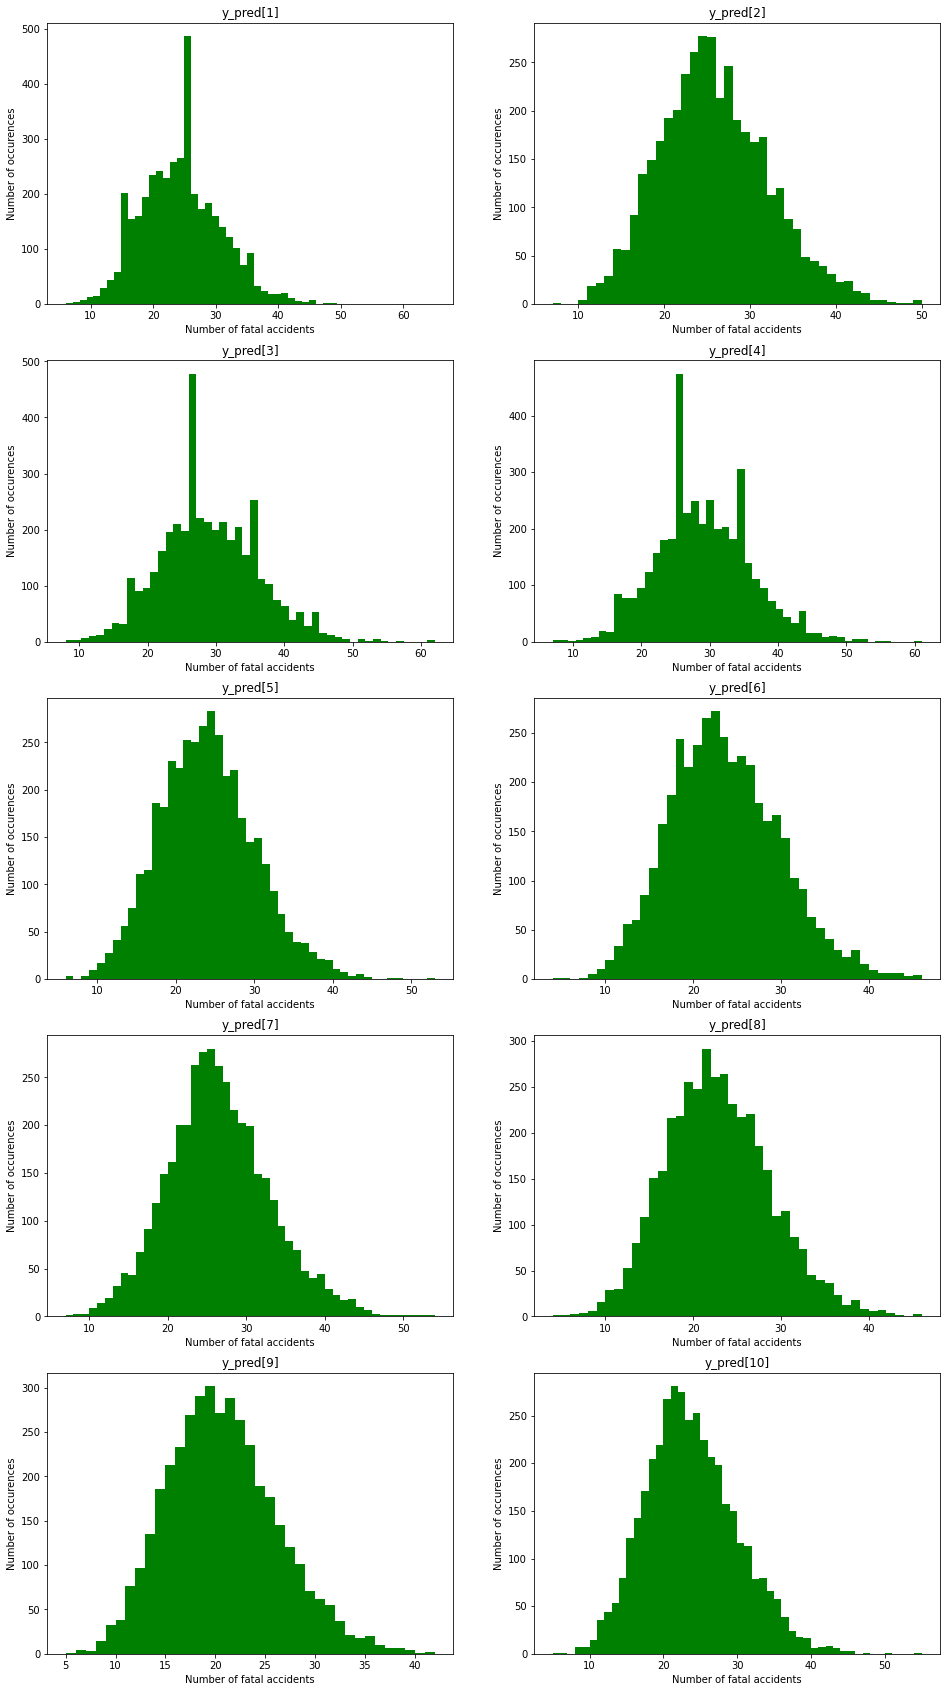

In [8]:
model_pst = CmdStanModel(stan_file='posterior.stan')
pst = model_pst.sample(data={"N" : len(data), 
                             "y" : data["Fatal accidents"].values,
                             "miles" : data["Miles flown [100 mln miles]"] / 10000 }, # For model to work, mean miles have to be kept in range <0, 1>
                       )

pst_df = pst.draws_pd()
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(16, 30))
for i, ax in zip(range(1, 11), axs.ravel()):
    ax.hist(pst_df["y_pred[{}]".format(i)].values, bins="auto", color='green')
    ax.set_title("y_pred[{}]".format(i))
    ax.set_xlabel("Number of fatal accidents")
    ax.set_ylabel("Number of occurences")
plt.show()